# CNN 알고리즘

# 1. 라이브러리 불러오기

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.utils import plot_model
import matplotlib.pyplot as plt

# 2. 데이터 읽어오기

In [2]:
# 훈련용, 평가용 데이터를 분류해서 가져와야 함.
# 훈련용 Train [질문,답], 평가용 Test [질문,답]
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [3]:
# 데이터 확인
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# 정답확인 35556
train_labels[35556]

np.uint8(9)

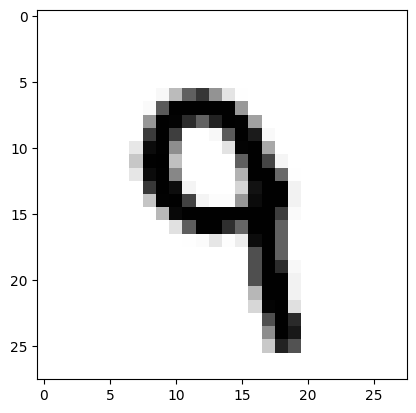

In [5]:
# 실제 이미지(문제)가 일치하는지 확인 : Grays : 흑백으로 표시
plt.imshow(train_images[35556], cmap='Grays')

# 2-1. 전처리작업

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [7]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [8]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
# 전처리작업
# 0-255를 0-1사이의 실수로 변경
train_images, test_images = train_images / 255.0, test_images / 255.0

In [19]:
train_images[0]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0

# 3. 신경망 만들기

In [12]:
# CNN 알고리즘 설계(Keras)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


c:\Users\topcd\anaconda3\envs\p310_aitest\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

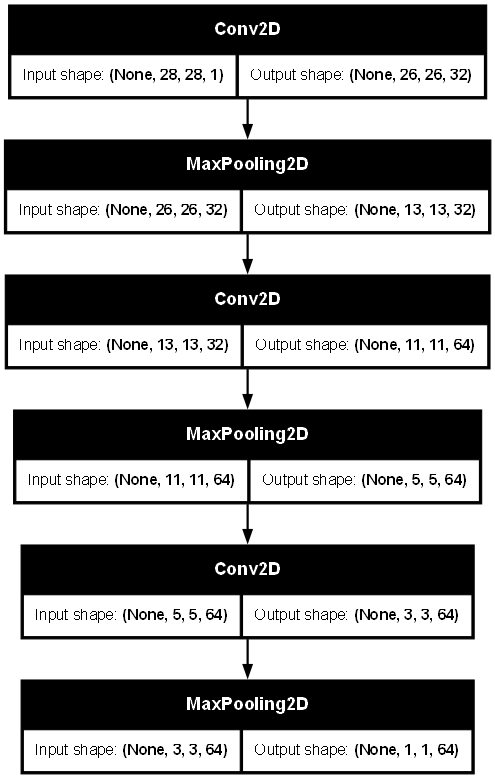

In [14]:
# 인공지능 설계 모델을 그래프로 확인
plot_model(model, show_shapes=True, dpi=80)

# 분류단계

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 4. 설계된 모델 학습하기

In [16]:
# sparse > 원핫인코딩, categorical > 결과값 여러개, binary > 2개
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']                
)

In [19]:
# 모델 훈련
history = model.fit(
    train_images,
    train_labels,
    batch_size=16,
    epochs=5,
    verbose=1,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9833 - val_loss: 0.0584
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9945 - loss: 0.0180 - val_accuracy: 0.9877 - val_loss: 0.0515
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9868 - val_loss: 0.0545
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9878 - val_loss: 0.0560
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9869 - val_loss: 0.0652


In [21]:
# 훈련결과 정보 확인
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

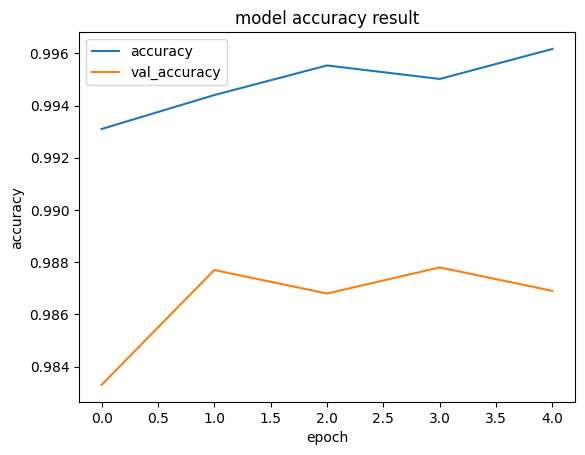

In [22]:
# 훈련 결과 그래프로 표시
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy result')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

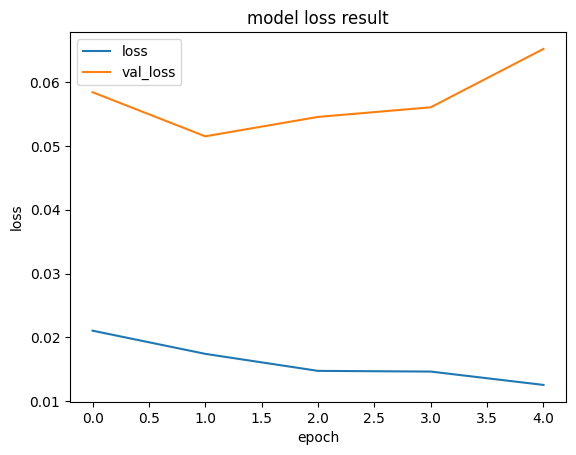

In [23]:
# 손실 함수수 그래프로 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss result')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# 5. 모델 적용

In [24]:
# 모델 평가
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9869 - loss: 0.0652


In [25]:
loss

0.0651879608631134

In [26]:
acc

0.9868999719619751

# 5-1 모델 예측

In [27]:
# test 이미지를 잘 맞추는지 예측
result = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
result[556]

array([2.6966951e-23, 1.2935393e-10, 3.2959379e-17, 5.4120733e-24,
       1.0000000e+00, 3.9291133e-19, 3.3957546e-16, 6.9591963e-14,
       3.0153626e-18, 2.6638045e-15], dtype=float32)

In [29]:
result_value = np.argmax(result[556])

In [31]:
print("예측 결과값 :", result_value)

예측 결과값 : 4


In [32]:
test_labels[556]

np.uint8(4)

In [33]:
# 학습한 모델 저장
model.save('cnn_epochs(10)_20250519_v10.h5')